# Import all libraries 

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bikeDf = pd.read_csv("day.csv")
bikeDf.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [173]:
bikeDf.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [174]:
# Check for Missing Values if any
bikeDf.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Rename variables 

In [175]:
bikeDf.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bikeDf.head()



,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [176]:

bikeDf['season']=bikeDf.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bikeDf['month']=bikeDf.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikeDf['weathersit']=bikeDf.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bikeDf['weekday']=bikeDf.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})


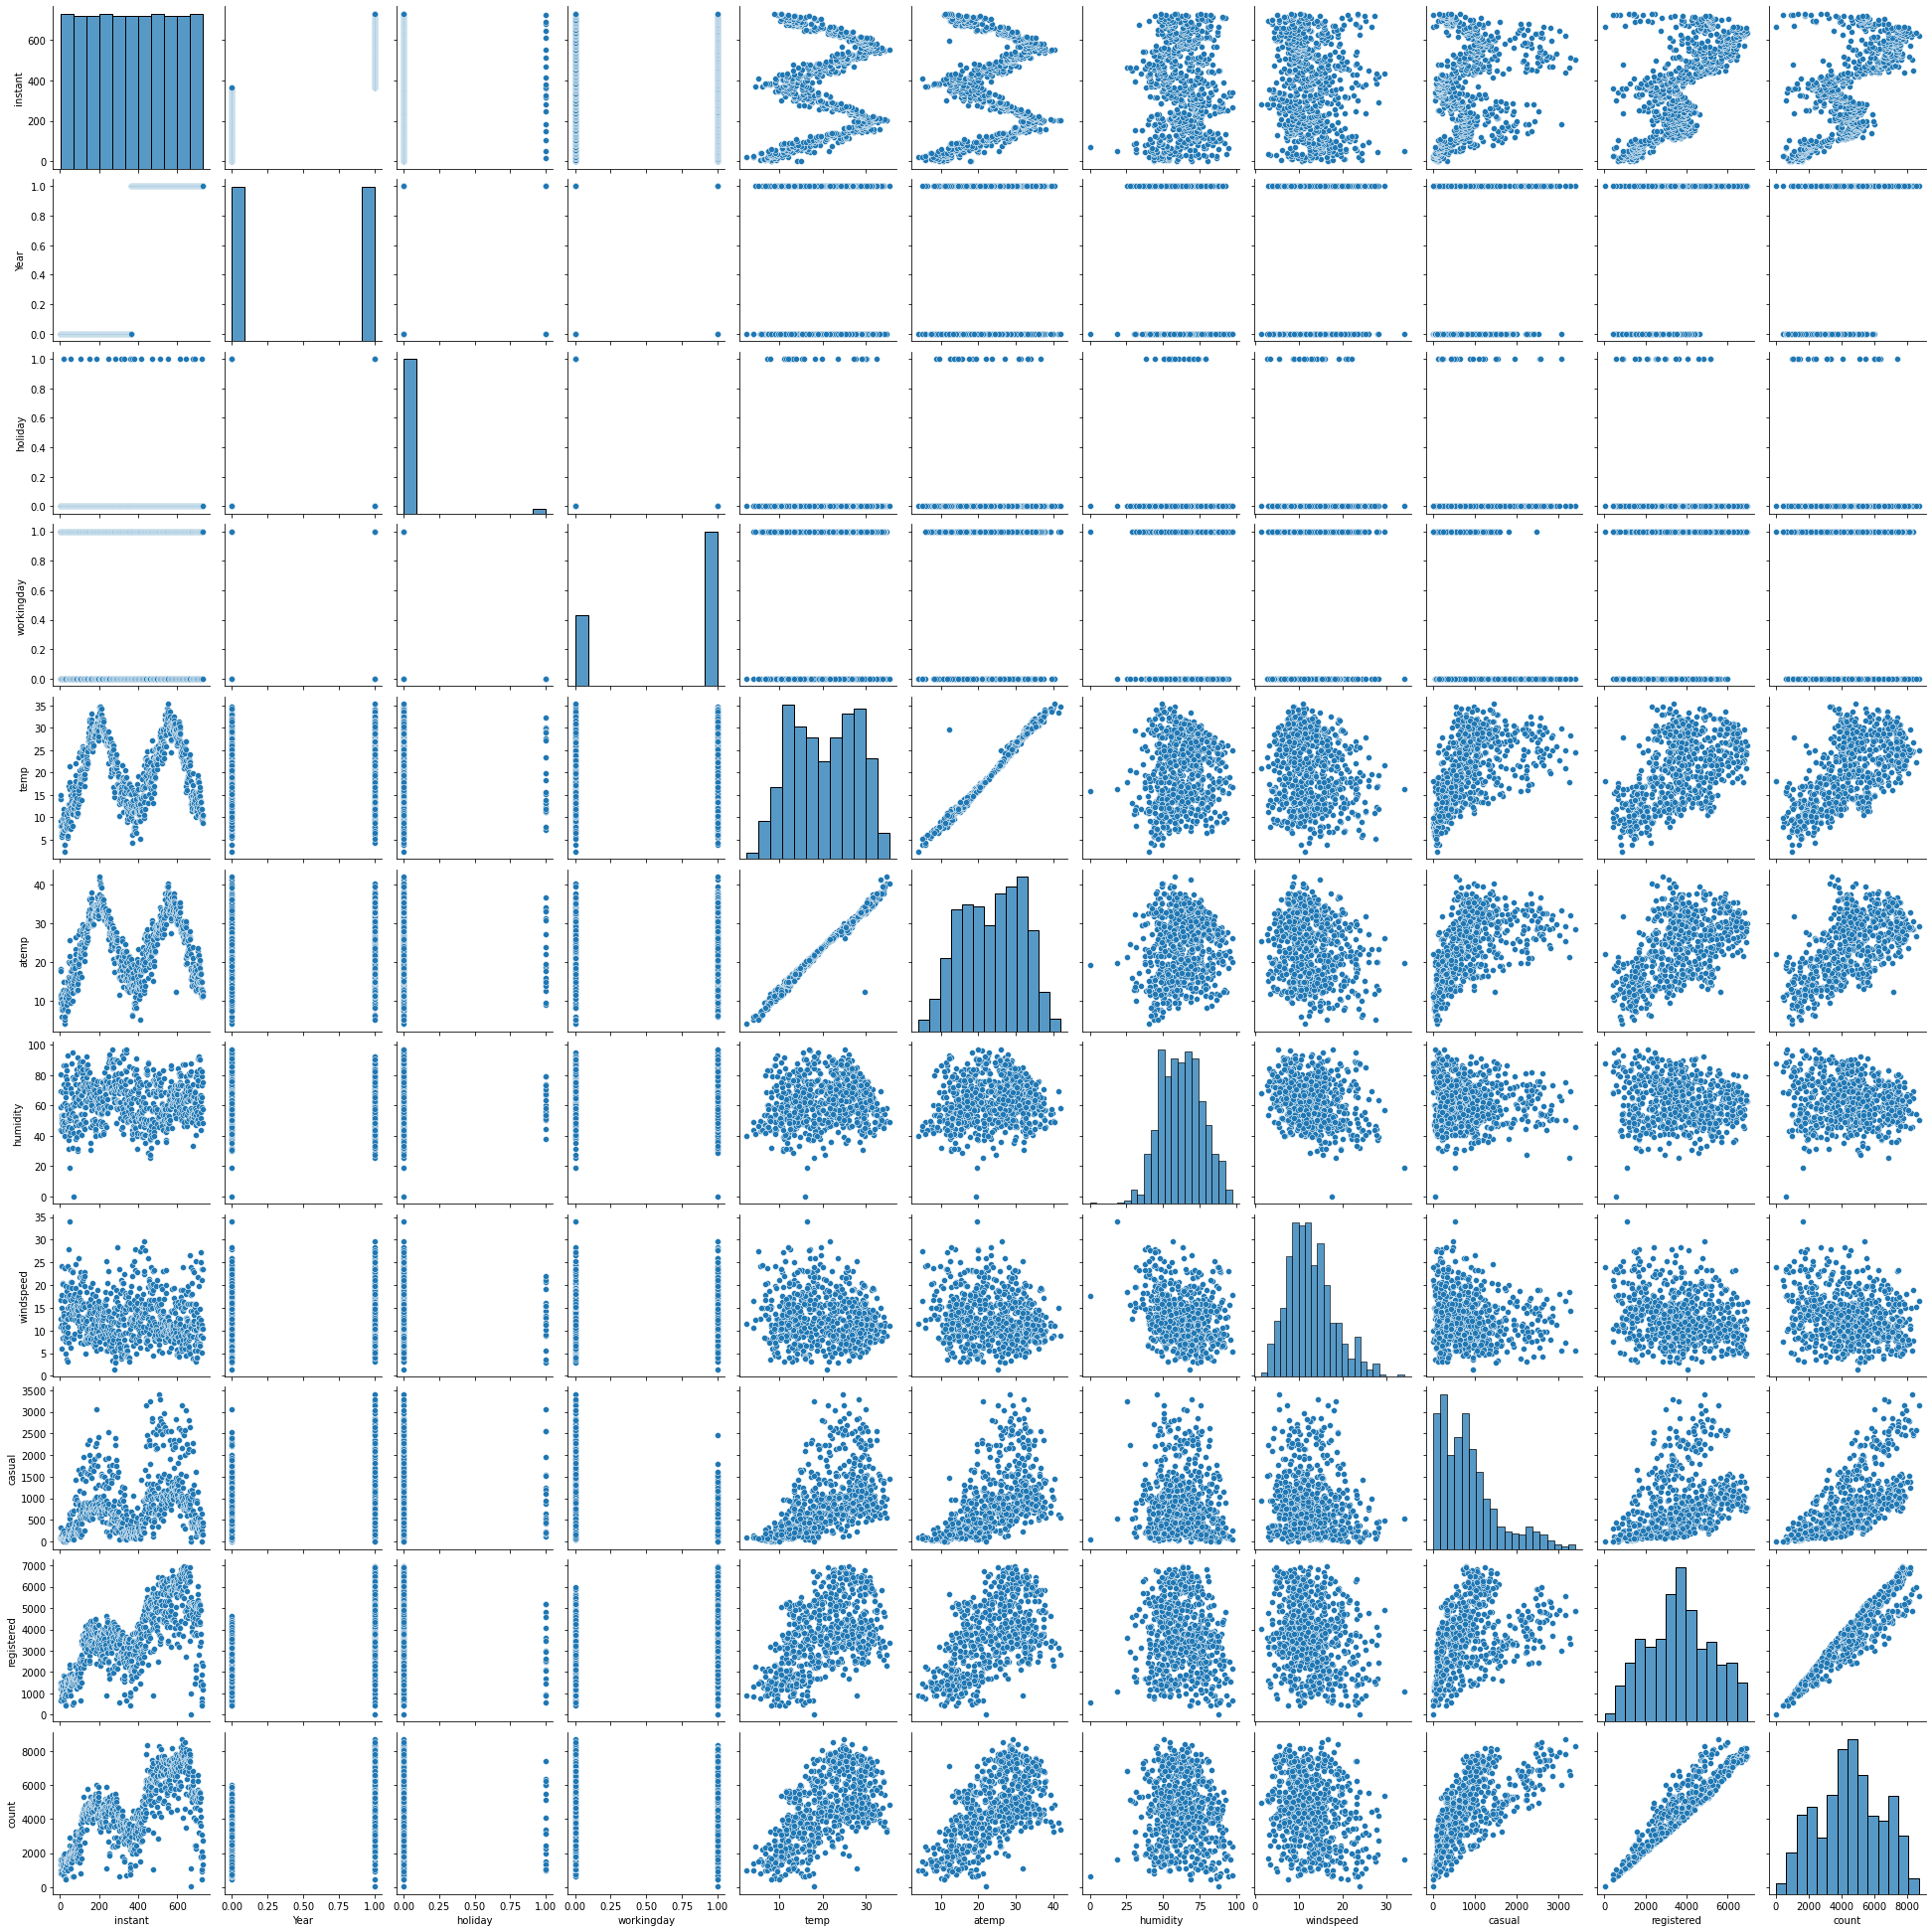

In [177]:

#Pairplot   variables
sns.pairplot(bikeDf)
plt.show()

In [178]:
# Since too much variables , we need to choose specific ones , we vl try to take continous variables
bikeDf.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

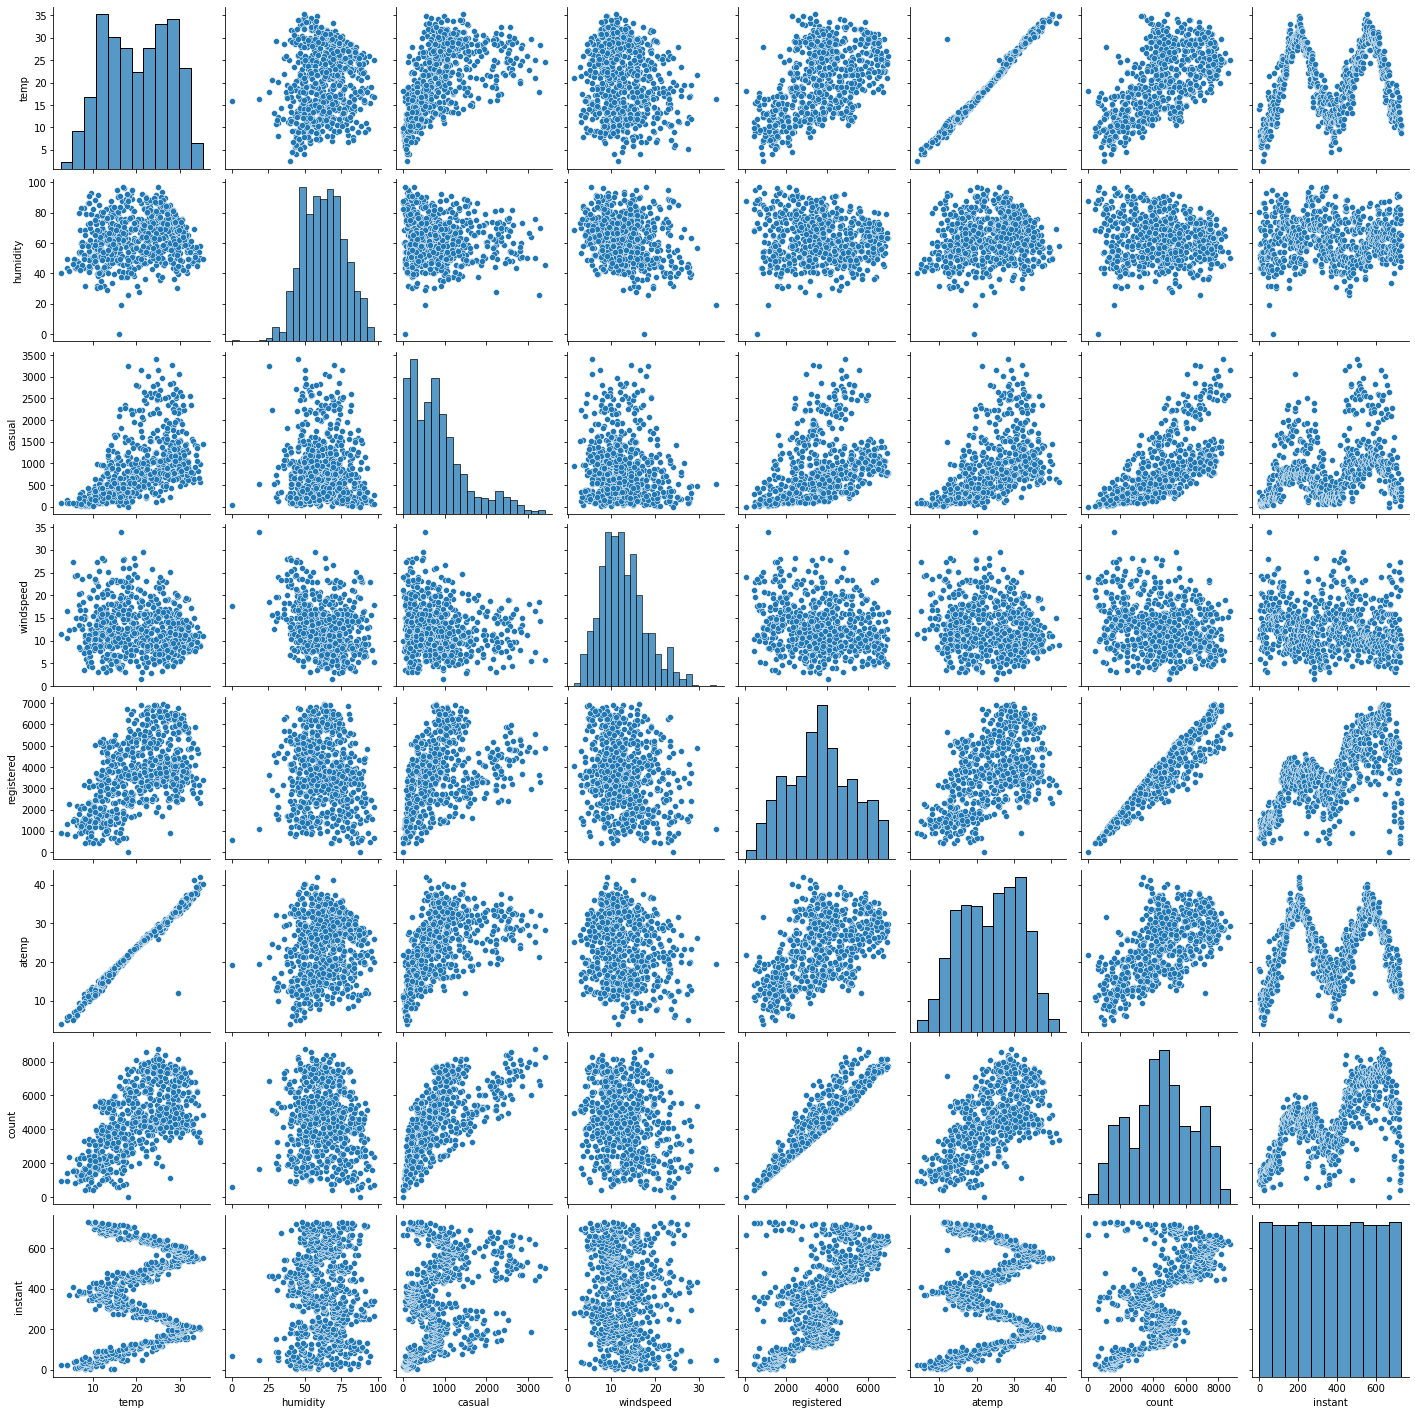

In [179]:
sns.pairplot(bikeDf, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

## Observation:
- Biker rentals has direct corelation with registered , casual and temp
- Since we need to discard registered and casual
- Hence rentals have direct corelation with temp

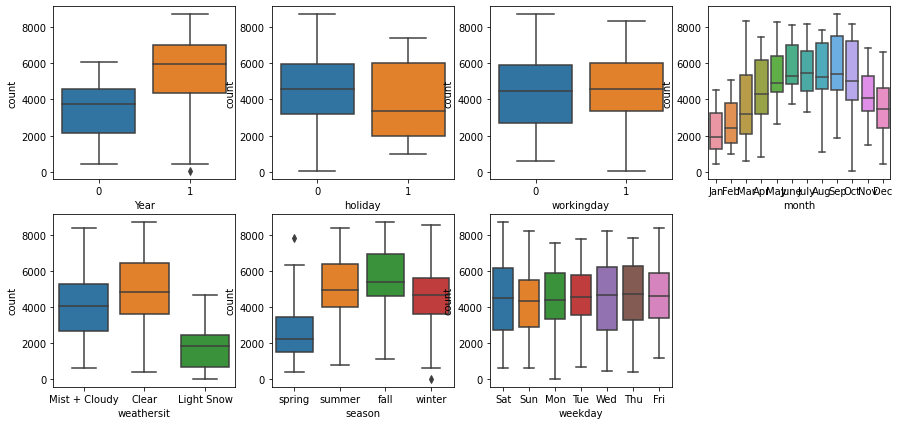

In [180]:
# Visualse categorical variables
plt.figure(figsize=(15, 7))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bikeDf)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bikeDf)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bikeDf)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bikeDf)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bikeDf)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bikeDf)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bikeDf)
plt.show()


## Observations
- Bike rentals are more during season sumer and fall
- Bike rentals are not impacted with day of week
- Bike rentals increases with time i.e.. more rentals in next year
- Bike rentals are maximum during mid of year

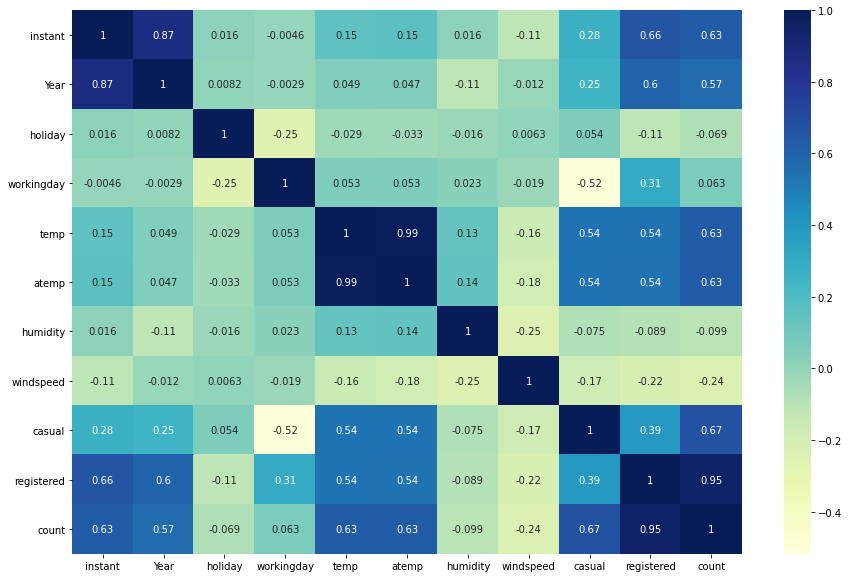

In [181]:
# Corelation b/w variables
plt.figure(figsize=(15, 10))
sns.heatmap(bikeDf.corr(), cmap='YlGnBu', annot = True)
plt.show()

## Shall we consider Linear Regression?
- There are multiple varaibles which has either positive or negative corelation with cnt , hence we can use Linear Regression Model

## DATA CLEANING

In [182]:
# Drop Columns
bikeDf=bikeDf.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bikeDf.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


#### DATA PREPERATION

In [183]:
seasons=pd.get_dummies(bikeDf.season,drop_first=True)
weather_sit=pd.get_dummies(bikeDf.weathersit,drop_first=True)
months=pd.get_dummies(bikeDf.month,drop_first=True)
weekdays=pd.get_dummies(bikeDf.weekday,drop_first=True)

bikeDf = pd.concat([bikeDf,seasons,weather_sit,months,weekdays],axis=1)
bikeDf.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


In [184]:
#Drop the parent columns of dummy variables
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
bikeDf.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bikeDf.head()

,Year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [185]:
bikeDf.shape

(730, 29)

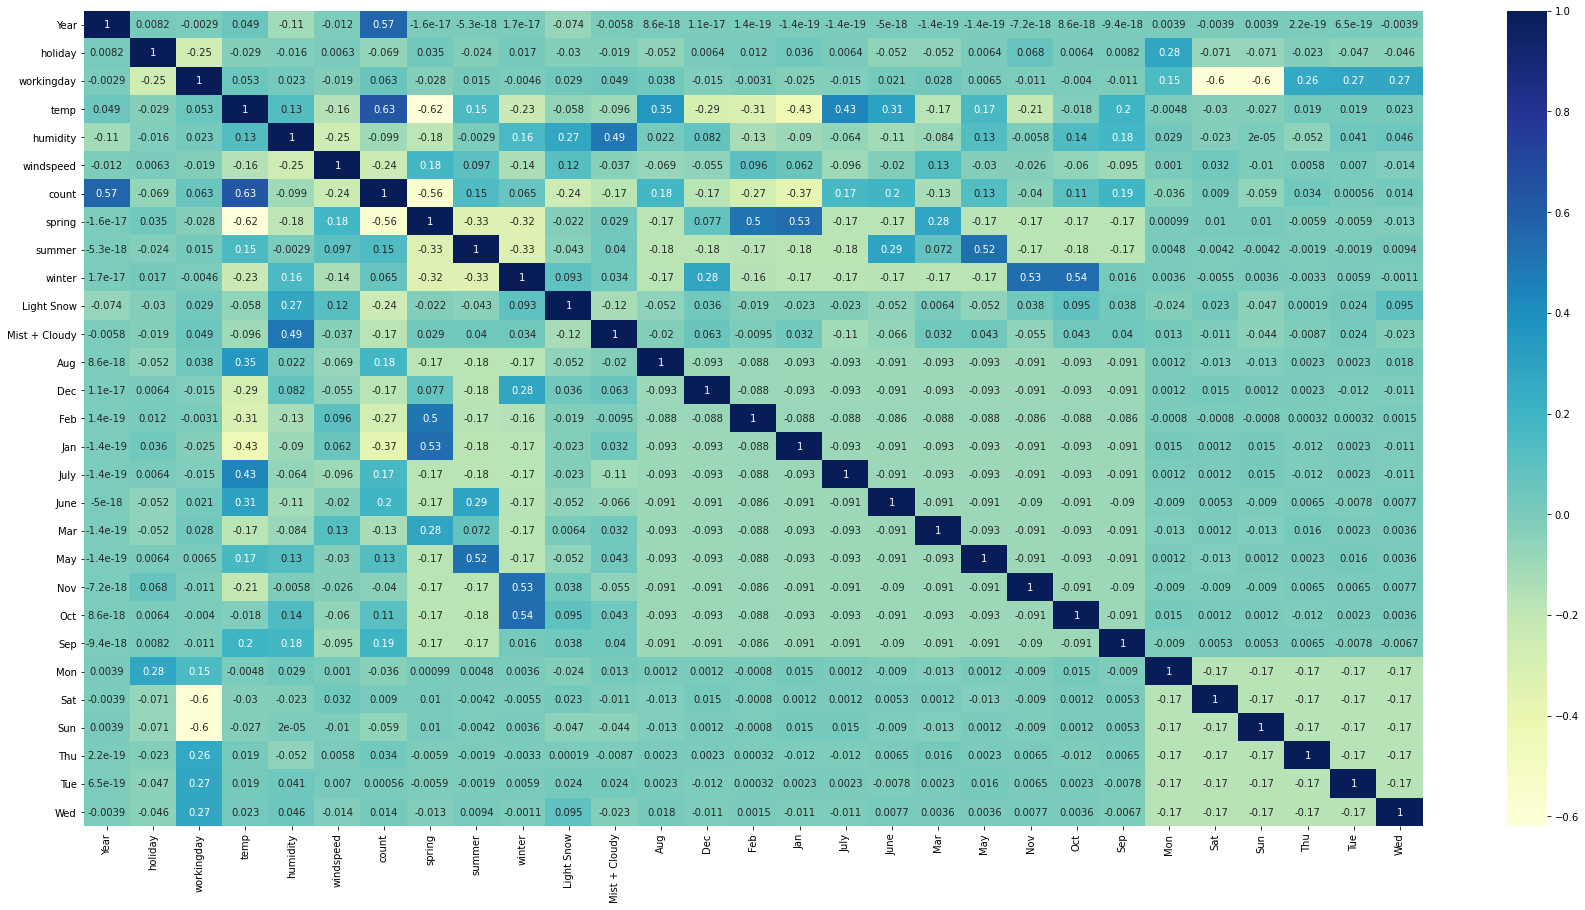

In [186]:
plt.figure(figsize=(30, 15))
sns.heatmap(bikeDf.corr(), cmap='YlGnBu', annot = True)
plt.show()

## BUILD MODEL

In [187]:
from sklearn.model_selection import train_test_split
bikeDf_train, bikeDf_test = train_test_split(bikeDf, train_size = 0.7, random_state = 100)
print(bikeDf_train.shape)
print(bikeDf_test.shape)

(510, 29)
(220, 29)


#### Rescale variables so that model becomes easy to interpret
- For now we will doing min max rescaling

In [188]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bikeDf_train[num_vars] = scaler.fit_transform(bikeDf_train[num_vars])
bikeDf_train.head()

<ipython-input-188-64980022cd00>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikeDf_train[num_vars] = scaler.fit_transform(bikeDf_train[num_vars])
/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
bikeDf_train.describe()

,Year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observation:
- Max values are 1
- All the values are b/w 0 and 1 , hence rescaled

In [190]:
y_train = bikeDf_train.pop('count')
X_train = bikeDf_train

### Select the variables by eliminating the variables via RFE

In [191]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [192]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 5),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11)]

#### Observation:
- Columns with Support value as False needs to be remvoed and also values with high ranking value

In [193]:
supportColumns = X_train.columns[rfe.support_]
print(supportColumns)

Index(['Year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow', 'Mist + Cloudy', 'Jan',
       'July', 'Sep', 'Sat'],
      dtype='object')


In [194]:

X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

In [195]:

X_train_rfe = X_train[supportColumns]

#!pip3 install statsmodels
# Add constant variable 
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [196]:
# Linear Model
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.22e-191
Time:                        18:39:52   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969

In [197]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Drop constant

In [198]:
#Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
10,Mist + Cloudy,2.29
0,Year,2.09
14,Sat,1.98


## Observation:
- january has high p value near to 0.05 , hence we should drop it


In [199]:

X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)
#Rebuild Model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.11e-191
Time:                        18:39:52   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2402      0.036      6.714

In [200]:
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,humidity,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
6,spring,4.24
8,winter,3.42
7,summer,2.85
10,Mist + Cloudy,2.29
0,Year,2.08
13,Sat,1.97


#### Observation:
- Humidity has very high VIF , hence can be dropped


In [201]:
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.28e-188
Time:                        18:39:52   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1576      0.031      5.126

In [202]:
X_train_lm2.head()

,const,Year,holiday,workingday,temp,windspeed,spring,summer,winter,Light Snow,Mist + Cloudy,July,Sep,Sat
576,1.0,1,0,1,0.815169,0.264686,0,0,0,0,0,1,0,0
426,1.0,1,0,0,0.442393,0.255342,1,0,0,0,1,0,0,1
728,1.0,1,0,0,0.245101,0.663106,1,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.188475,0,1,0,0,1,0,0,1
111,1.0,0,0,1,0.345824,0.380981,0,1,0,0,1,0,0,0


In [203]:
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,spring,2.49
6,summer,2.34
0,Year,2.07
7,winter,1.98
12,Sat,1.96
10,July,1.58
9,Mist + Cloudy,1.57


In [204]:
# Drop holiday due to high p value

X_train_new3=X_train_lm2.drop(['holiday'],axis=1)

In [205]:
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.12e-189
Time:                        18:39:52   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1492      0.031      4.881

In [206]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.73
5,spring,4.95
3,temp,3.39
7,winter,3.35
6,summer,2.60
2,workingday,1.65
12,Sat,1.63
10,July,1.48
11,Sep,1.28
4,windspeed,1.09


In [207]:
# Drop Windspeed due to high VIF
X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)
X_train_new4= X_train_lm3.drop(['const'], axis=1)
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())
X_train_lm4= X_train_lm4.drop(['const'], axis=1)
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.12e-189
Time:                        18:39:52   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1492      0.031      4.881

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
4,spring,2.38
5,summer,2.32
0,Year,2.07
6,winter,1.91
11,Sat,1.83
9,July,1.58
8,Mist + Cloudy,1.57


In [208]:
# Drop temp due to high VIF
X_train_new5= X_train_lm4.drop(['temp'], axis=1)
X_train_lm5=sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm4.summary())
X_train_lm5= X_train_lm5.drop(['const'], axis=1)
vif = pd.DataFrame()
X =X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.12e-189
Time:                        18:39:52   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1492      0.031      4.881

,Features,VIF
2,windspeed,4.16
1,workingday,3.54
4,summer,2.26
3,spring,2.25
0,Year,1.91
5,winter,1.91
10,Sat,1.62
7,Mist + Cloudy,1.56
8,July,1.29
9,Sep,1.22


In [209]:
# Drop July due high p value 
# Drop temp due to high VIF
X_train_new6= X_train_lm5.drop(['July'], axis=1)
X_train_new6= X_train_lm6.drop(['const'], axis=1)
X_train_lm6=sm.add_constant(X_train_new6)
lm6=sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())
X_train_lm5= X_train_lm6.drop(['const'], axis=1)
vif = pd.DataFrame()
X =X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     164.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.49e-151
Time:                        18:39:52   Log-Likelihood:                 410.80
No. Observations:                 510   AIC:                            -799.6
Df Residuals:                     499   BIC:                            -753.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5299      0.018     29.127

,Features,VIF
2,windspeed,4.00
1,workingday,3.29
3,spring,2.00
4,summer,2.00
0,Year,1.88
5,winter,1.73
7,Mist + Cloudy,1.56
9,Sat,1.56
8,Sep,1.18
6,Light Snow,1.08


#### Observation
- We don't see High p Value or High VIF model 6 seems to be a good model for prediction

In [210]:
print(X_train_lm6)


     const  Year  workingday  windspeed  spring  summer  winter  Light Snow  \
576    1.0     1           1   0.264686       0       0       0           0   
426    1.0     1           0   0.255342       1       0       0           0   
728    1.0     1           0   0.663106       1       0       0           0   
482    1.0     1           0   0.188475       0       1       0           0   
111    1.0     0           1   0.380981       0       1       0           0   
..     ...   ...         ...        ...     ...     ...     ...         ...   
578    1.0     1           1   0.187140       0       0       0           0   
53     1.0     0           1   0.111379       1       0       0           0   
350    1.0     0           0   0.431816       0       0       1           0   
79     1.0     0           1   0.529881       0       1       0           0   
520    1.0     1           1   0.359599       0       1       0           0   

     Mist + Cloudy  Sep  Sat  
576              0  

In [211]:
y_train_pred = lm6.predict(X_train_lm6)

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Plot Error Histogram 
- Mean should be near to 0
- Error should be in Normal Distribution

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

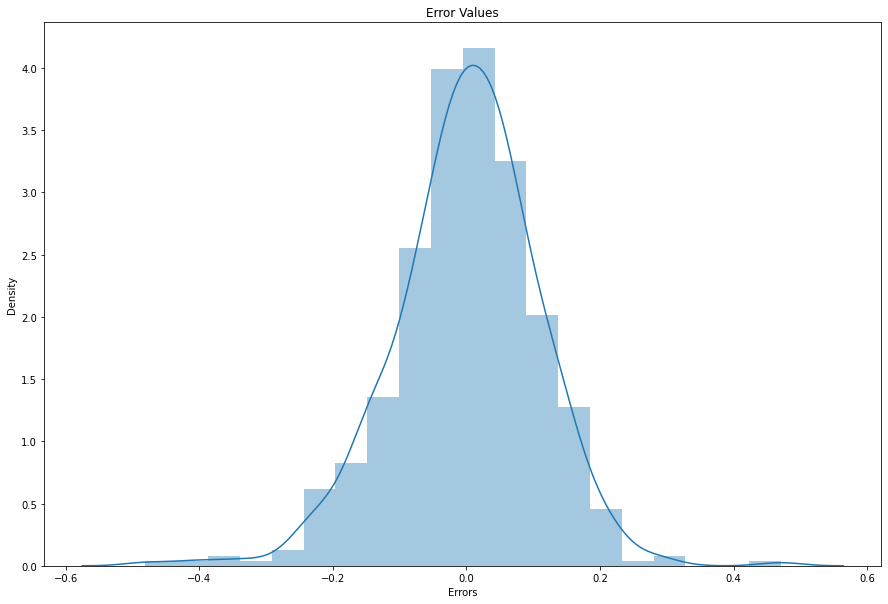

In [217]:

fig = plt.figure()
plt.figure(figsize=(15,10))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Values')                  # Plot heading 
plt.xlabel('Errors')  # X-label
plt.show()

## Observation:
- Error Histogram confers to our error assumptions, we can proceed with predictions

In [219]:
#Scale Data
num_vars=['temp','humidity','windspeed','count']

bikeDf_test[num_vars] = scaler.transform(bikeDf_test[num_vars])
bikeDf_test.head()

<ipython-input-219-669f2692e7d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikeDf_test[num_vars] = scaler.transform(bikeDf_test[num_vars])
/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [220]:
# Divide it into X and Y
y_test = bikeDf_test.pop('count')
X_test = bikeDf_test
X_test.head()

,Year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [222]:
X_test_new = X_test[X_train_new6.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Year,workingday,windspeed,spring,summer,winter,Light Snow,Mist + Cloudy,Sep,Sat
184,1.0,0,0,0.084219,0,0,0,0,1,0,0
535,1.0,1,1,0.153728,0,1,0,0,0,0,0
299,1.0,0,1,0.334206,0,0,1,0,1,0,0
221,1.0,0,1,0.339570,0,0,0,0,0,0,0
152,1.0,0,1,0.537414,0,1,0,0,0,0,0


In [224]:
y_pred = lm6.predict(X_test_new1)

In [239]:
# Evaluate R square
from sklearn.metrics import r2_score
print("Test R Square: ", r2_score(y_test,y_pred))
AdjR2=1-(1-0.7512328527170702)*(11-1)/(11-1-1)
print("Test Adj R Square: ",AdjR2)


Test R Square:  0.7512328527170702
Test Adj R Square:  0.7235920585745224


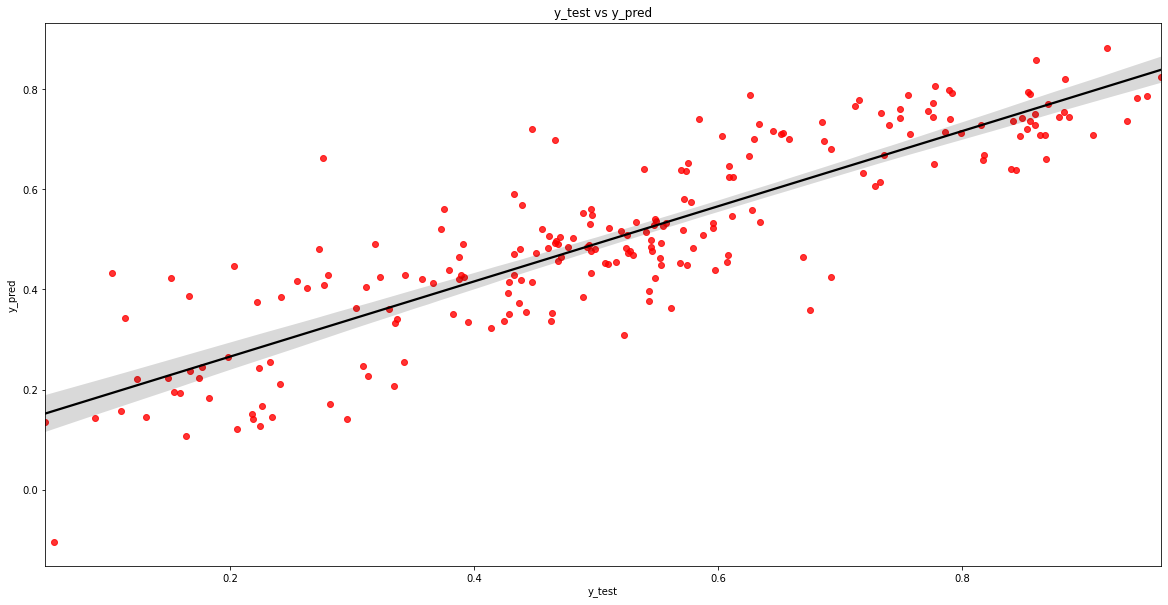

In [242]:
# Plot y_test wrt y_pred to understand spread
plt.figure(figsize=(20,10))
sns.regplot(x=y_test, y=y_pred, fit_reg=True,scatter_kws={"color": "red"}, line_kws={"color": "black"})

plt.title('y_test vs y_pred')              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_pred')                          # Y-label
plt.show()                        

## IMP PARAMETERS
- Test R Square:0.7512328527170702
- Test Adj R Square: 0.7235920585745224
- Train R-squared:                       0.767
- Train Adj. R-squared:                  0.763

In [240]:
# Delta B/w Train and Test R Square:
rSqaureDelta = (0.767-0.7512328527170702)*100/0.767
adjRSqDelta = (0.763 - 0.7235920585745224)*100/0.763
print("R Square Difference = ",rSqaureDelta)
print("Adj R Square Difference = ",adjRSqDelta)

R Square Difference =  2.0556906496649057
Adj R Square Difference =  5.16486781461044


## Observation:
- Difference b/w R Square is 2% and Adj R Square is 5.16 %

## Since Difference is either less than 5% or near to 5% , we can safely say our Model is Good Model